Привет, Андрей!)
<br> Меня зовут Дуолан 👋 Буду проверять твой проект. Давай вместе доведем его до идеала 😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

# Отток клиентов

## Описание проекта

### Описание целей и задачи проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.
Постройте модель с предельно большим значением F1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте F1-меру на тестовой выборке самостоятельно.
Дополнительно измеряйте AUC-ROC, сравнивайте её значение с F1-мерой.

### Описание данных

Признаки
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак
* Exited — факт ухода клиента

### План работы

1)Загрузить и подготовить данные. Пояснить порядок действий.
2)Исследовать баланс классов, обучить модель без учёта дисбаланса. Кратко описать выводы.
3)Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели и найти лучшую. Кратко описать выводы.
4)Провести финальное тестирование.

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> 

Важно чтобы в проектах было подробное описание: когда потенциальные работодатели будут смотреть твой проект в портфолио, им нужно будет понимать задачу, чтобы можно было оценить её решение. Вот что можно добавить:
    
* Описание целей и задачи проекта
* Описание данных
* План работы

И рекомендую писать введение от первого лица множественного числа. Так работа выглядит более самостоятельной)
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> добавлено подробное описание
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Импорт выглядит отлично 👍
</div>

In [2]:
#чтение файла
df = pd.read_csv('C:\\Users\\ASUS\\Downloads\\Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
df.duplicated().sum()

0

### Пропуски

In [6]:
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

В столбце 'Tenure' присутствуют пропуски. По этому столбцу известно сколько лет человек является клиентом банка. Возможные причины их появления: 1.человеческий фактор; 2.новые клиенты, которые должны иметь в рецепте значение 0. Значения 0 в рецептах присутствуют, а значит не стоит заполнять пропуски 0, чтобы не искозить метрики 

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Ты хорошо владеешь методами первичного анализа данных 👍
</div>

### Изменение типов данных

В столбце 'Tenure' наблюдаются целые значения, которые обозначены типом float. Изменить на int не получится, т.к. присутствуют пропуски.
В остальных столбцах все хорошо.

In [7]:
df[df.isna().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


<div class="alert alert-block alert-info">
<b>Изменения:</b> пропуски были заполнены рандомными числами в промежутке от минимального до максимального значений колонки 'Tenure'. Мне понравился больше такой вариант, т.к. значение на 5 лет ненамного поменяется.
</div>

In [8]:
df['Tenure'] = df['Tenure'].fillna(random.randint(df['Tenure'].min(),df['Tenure'].max()))

In [9]:
df['Tenure'] = df['Tenure'].astype('int64')

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Посмотри еще на такие варианты работы с пропусками:

1. Распределение по годам использования банка практически ровное, если сейчас заменить 909 пропусков медианой, то мы увеличим в 2 раза значение для 5 лет. Это кажется некорректным. Можно сделать заполнение пропусков случайными числами, тогда мы снизим влияние на наше распределение.

2. Так как значений в этом признаке ограниченное количество, можно сделать его категориальным признаком. Пропуски можно считать как за отдельную категорию (заполнить значением -1). Затем заменить тип данных Tenure на object и применить технику OHE.

3. Заполнить "0", считая, что это новые клиенты.
</div>

In [10]:
df['Balance'] = df['Balance'].astype('int64')
df['EstimatedSalary'] = df['EstimatedSalary'].astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RowNumber        10000 non-null  int64 
 1   CustomerId       10000 non-null  int64 
 2   Surname          10000 non-null  object
 3   CreditScore      10000 non-null  int64 
 4   Geography        10000 non-null  object
 5   Gender           10000 non-null  object
 6   Age              10000 non-null  int64 
 7   Tenure           10000 non-null  int64 
 8   Balance          10000 non-null  int64 
 9   NumOfProducts    10000 non-null  int64 
 10  HasCrCard        10000 non-null  int64 
 11  IsActiveMember   10000 non-null  int64 
 12  EstimatedSalary  10000 non-null  int64 
 13  Exited           10000 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 1.1+ MB


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍
</div>

### Прямое кодирование

In [12]:
#прямое кодирование с использованием дамми-ловушки
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,619,42,2,0,1,1,1,101348,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,608,41,1,83807,1,0,1,112542,...,0,0,0,0,0,0,0,0,1,0
2,3,15619304,502,42,8,159660,3,1,0,113931,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,699,39,1,0,2,0,0,93826,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,850,43,2,125510,1,1,1,79084,...,0,0,0,0,0,0,0,0,1,0


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

В данном случае это наиболее подходящий способ закодировать категориальные колонки 👍
</div>

### Разбиение данных

In [13]:
target = df['Exited']
delete=['RowNumber','CustomerId','Surname','Geography','Gender','Exited']
features = df.drop(delete, axis=1)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍
</div>

In [14]:
features_train, features_v, target_train, target_v = train_test_split(
    features, target, test_size=0.4, random_state=12345)#разделение обучающей, валидационной, тестовой выборки как 60:20:20

In [15]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_v, target_v, test_size=0.5, random_state=12345)

In [16]:
features_train.shape

In [17]:
target_train.shape

In [18]:
features_valid.shape

In [19]:
target_valid.shape

In [20]:
features_test.shape

In [21]:
target_test.shape

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

In [22]:
#масштабирование признаков
numeric=['CreditScore','Age','Tenure','Balance','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [23]:
features_train.shape

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Отлично, признаки масштабированы 👍 Не забыли, что fit нужно делать только на train выборке.
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Тестовую выборку тоже нужно масштабировать
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> масштабировал тестовую выборку.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

### Вывод

В данных присутствовали пропуски и несоответствующий тип данных для создания моделей.

## Исследование моделей без учета дисбаланса

In [24]:
#проверка адекватности модели
target_pred_constant=pd.Series([0]*len(df['Exited']))

print(accuracy_score(target, target_pred_constant))

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Виден явный дисбаланс классов в пользу отрицательного класса. Если мы будем всех людей прогнозировать, что они не уйдут из банка, то в 80% случаев мы будем правы.
</div>

### Дерево решений

In [25]:
best_score=0
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)# создание модели дерева решений

    # обучение модели
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)# предсказания на валидационной выборке
    

    print("max_depth valid =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid))
    if best_score<accuracy_score(target_valid, predictions_valid):
        best_score=accuracy_score(target_valid, predictions_valid)#наилучший показатель
print('Accuracy наилучшей модели =',best_score)

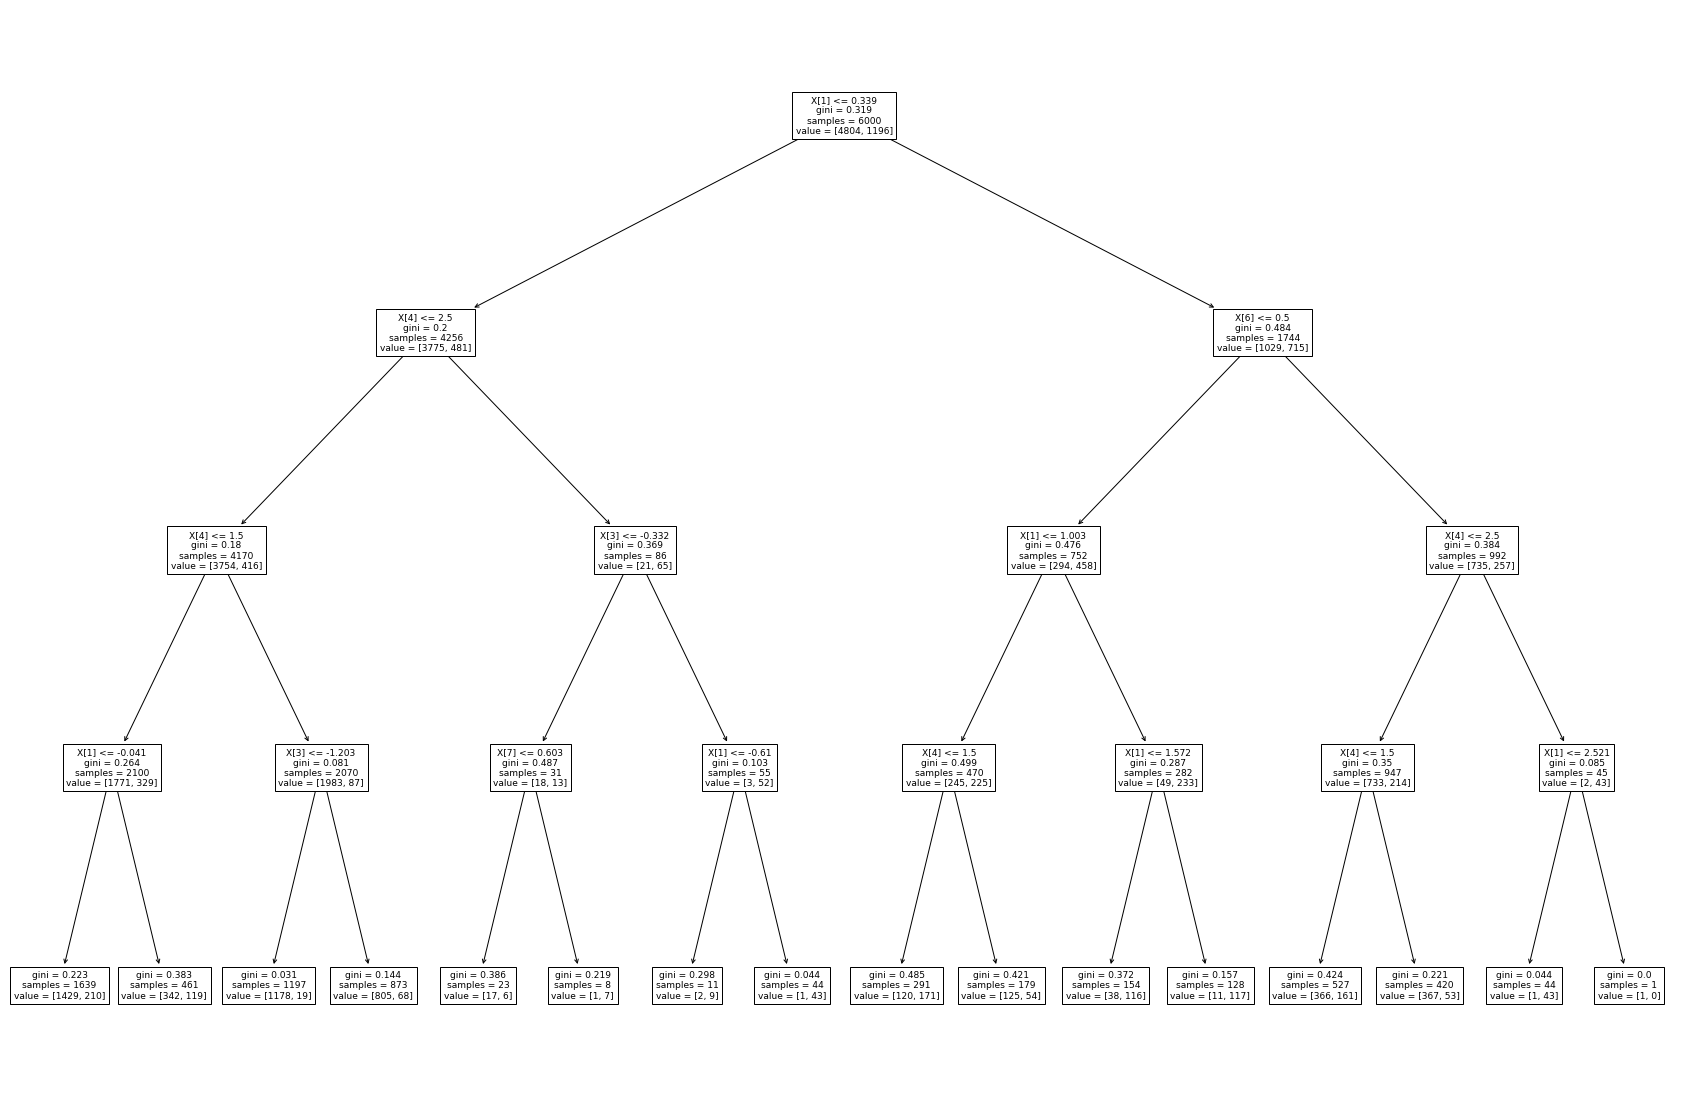

In [26]:
import matplotlib.pyplot as plt
from sklearn import tree

model = DecisionTreeClassifier(random_state=12345,max_depth=4)# создание модели дерева решений

# обучение модели
model.fit(features_train,target_train)

fig, ax = plt.subplots(figsize=(30,20))
tree.plot_tree(model)
plt.show()

accuracy решающего дерева и константной модели отличаются немного. Проверим метрику f1-меры модели:

In [27]:
model = DecisionTreeClassifier(random_state=12345,max_depth=depth)# создание модели дерева решений

# обучение модели
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)# предсказания на валидационной выборке

print(f1_score(target_valid,predicted_valid))

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Модель обучена верно 👍
</div>

### Случайный лес

In [28]:
best_model = None
best_result = 0
for depth in range(2, 22, 2):
    for est in range(50, 351, 50):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # обучение модели с заданным количеством деревьев
        model.fit(features_train,target_train) # обучение модели на тренировочной выборке
        result = model.score(features_valid,target_valid) # качество модели на валидационной выборке
        if result > best_result:
            best_model = model# наилучшая модель
            best_result = result#  наилучшее значение метрики accuracy на валидационных данных
            best_est=est
            best_depth=depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result, 'луччшее количество деревьев',best_est,'лучшая глубина дерева',best_depth)

In [29]:
model=RandomForestClassifier(random_state=12345, n_estimators=best_est, max_depth=best_depth)
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)

print(f1_score(target_valid,predicted_valid))

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Для случайного леса стоит подбирать и глубину дерева:
</div>

```python
for depth in range(2, 22, 2):
    for est in range(50, 351, 50):
        ...
```

<div class="alert alert-block alert-info">
<b>Изменения:</b> Сделал)
</div>

### Логистическая регрессия

In [30]:
#прямое кодирование
target_ohe = df_ohe['Exited']
features_ohe = df_ohe.drop(['RowNumber','CustomerId','Exited'], axis=1)
features_train_ohe, features_v, target_train_ohe, target_v = train_test_split(
    features_ohe, target_ohe, test_size=0.4, random_state=12345)#разделение обучающей, валидационной, тестовой выборки как 60:20:20

features_valid_ohe, features_test_ohe, target_valid_ohe, target_test_ohe = train_test_split(
    features_v, target_v, test_size=0.5, random_state=12345)

numeric = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

scaler_ohe = StandardScaler()
scaler_ohe.fit(features_train_ohe[numeric])
features_train_ohe[numeric] = scaler_ohe.transform(features_train_ohe[numeric]) 
# < преобразуйте валидационную выборку >

features_valid_ohe[numeric] = scaler_ohe.transform(features_valid_ohe[numeric])
print(df_ohe)
print(features_train.shape)
print(features_valid.shape)

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Не стоит повторять код) Мы ведь уже выполнили кодирование, разбиение и масштабирование данных
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> df_ohe убрал(1 строку кода). И действия все эти делаю для прямого кодирования, верно?
</div>

In [31]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train_ohe, target_train_ohe)

predicted_valid = model.predict(features_valid_ohe)
accuracy_score(target_valid_ohe, predicted_valid)

In [32]:
print(f1_score(target_valid_ohe,predicted_valid))

### Вывод

Адекватность моделей без учета дисбаланса классов в процентном показатели выглядят не очень высокими. Модель случайного леса показывает наибольший показатель f1-меры  - 55% при точности в 86%. У логистической регрессии f1-мера равна 35%. У дерева решений f1-мера - 47%.

## Анализ моделей с учетом дисбаланса классов

In [33]:
#проверим размеры отрицательных и положительных классов
features_zeros = features[target == 0]
features_ones = features[target == 1]
target_zeros = target[target == 0]
target_ones = target[target == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

In [34]:
#увеличение выборки
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [35]:
print(features_upsampled.shape)
print(target_upsampled.shape)

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Параметр увеличения выборки нужно подобрать так, чтобы классы сбалансировались. Во сколько раз отрицательный класс больше положительного?
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> изучил балансировку и сделал соответствующие выводы. Исправил repeat = 4 вместо 10.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

In [36]:
#уменьшение выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Параметр уменьшения выборки нужно подобрать так, чтобы классы сбалансировались. Во сколько раз положительный класс меньше отрицательного?
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> изучил балансировку и сделал соответствующие выводы. Исправил repeat = 0.25 вместо 0.1.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

### Дерево решений

Попробуем применить несбалансированную классификацию несколькими способами:

In [38]:
#сбалансированный класс
best_score=0
for depth in range(1, 40):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth,class_weight='balanced')# создание модели дерева решений

    # обучение модели
    model.fit(features_train,target_train)
    predictions_valid = model.predict(features_valid)# предсказания на валидационной выборке
    

    print("max_depth valid =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid),"F1:", f1_score(target_valid, predictions_valid))
    if best_score<accuracy_score(target_valid, predictions_valid):
        best_score=accuracy_score(target_valid, predictions_valid)#наилучший показатель
print('Accuracy наилучшей модели =',best_score)

In [39]:
model = DecisionTreeClassifier(random_state=12345,max_depth=5,class_weight='balanced')
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)

print("F1: ", f1_score(target_valid, predicted_valid))
print("ROC_AUC: ", roc_auc_score(target_valid, predicted_valid))
print("RECALL: ", recall_score(target_valid, predicted_valid))
print("PRECISION: ", precision_score(target_valid, predicted_valid))
print("Accuracy_score ", accuracy_score(target_valid, predicted_valid))

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Модель со сбалансированными весами классов обучена корректно 👍
</div>

In [40]:
#увеличение выборки
best_score=0   
for depth in range(1, 40):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)# создание модели дерева решений
    # обучение модели
    model.fit(features_upsampled,target_upsampled)
    predictions_valid = model.predict(features_valid)# предсказания на валидационной выборке
    

    print("max_depth valid =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid),"F1:", f1_score(target_valid, predictions_valid))
    if best_score<accuracy_score(target_valid, predictions_valid):
        best_score=accuracy_score(target_valid, predictions_valid)#наилучший показатель
print('Accuracy наилучшей модели =',best_score)

In [41]:
model = DecisionTreeClassifier(random_state=12345,max_depth=5)
model.fit(features_upsampled,target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1: ", f1_score(target_valid, predicted_valid))
print("ROC_AUC: ", roc_auc_score(target_valid, predicted_valid))
print("RECALL: ", recall_score(target_valid, predicted_valid))
print("PRECISION: ", precision_score(target_valid, predicted_valid))
print("Accuracy_score ", accuracy_score(target_valid, predicted_valid))

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Балансировка весов классов (class_weight) и увеличение выборки это разные методы борьбы с дисбалансом. Их конечно можно использовать вместе, но в нашей задаче мы должны сравнивать их. Можешь выполнить их по отдельности?)
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Да, конечно :)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

In [42]:
best_score=0

for depth in range(1, 40):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)# создание модели дерева решений
    # обучение модели
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)# предсказания на валидационной выборке
    

    print("max_depth valid =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid),"F1:", f1_score(target_valid, predictions_valid))
    if best_score<accuracy_score(target_valid, predictions_valid):
        best_score=accuracy_score(target_valid, predictions_valid)#наилучший показатель
print('Accuracy наилучшей модели =',best_score)

In [43]:
model = DecisionTreeClassifier(random_state=12345,max_depth=6)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1: ", f1_score(target_valid, predicted_valid))
print("ROC_AUC: ", roc_auc_score(target_valid, predicted_valid))
print("RECALL: ", recall_score(target_valid, predicted_valid))
print("PRECISION: ", precision_score(target_valid, predicted_valid))
print("Accuracy_score ", accuracy_score(target_valid, predicted_valid))

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Здесь тоже нужно убрать `class_weight='balanced'`
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Сделал)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

### Случайный лес

In [44]:
#сбалансированный класс
best_model = None
best_f1 = 0
for depth in range(2, 22, 2):
    for est in range(50, 351, 50):
        model = RandomForestClassifier(random_state=12345, n_estimators=est,class_weight='balanced',max_depth=depth) # обучение модели с заданным количеством деревьев
        model.fit(features_train,target_train) # обучение модели на тренировочной выборке
        result = model.score(features_valid,target_valid) # качество модели на валидационной выборке
        predicted_valid = model.predict(features_valid)
        print("Accuracy наилучшей модели на валидационной выборке:", result, 'луччшее количество деревьев',est,'depth=',depth,'F1:',f1_score(target_valid,predicted_valid))
        if f1_score(target_valid,predicted_valid) > best_f1:
            best_model = model# наилучшая модель
            best_f1 = f1_score(target_valid,predicted_valid)#  наилучшее значение метрики accuracy на валидационных данных
            best_result=result = model.score(features_valid,target_valid)
            best_est=est
            best_depth=depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result,'лучшее f1:',best_f1, 'луччшее количество деревьев',best_est,'лучшая глубина дерева',best_depth)

In [45]:
model=RandomForestClassifier(random_state=12345, n_estimators=best_est,class_weight='balanced',max_depth=best_depth)
model.fit(features_train,target_train)
predicted_valid = model.predict(features_valid)

print("F1: ", f1_score(target_valid, predicted_valid))
print("ROC_AUC: ", roc_auc_score(target_valid, predicted_valid))
print("RECALL: ", recall_score(target_valid, predicted_valid))
print("PRECISION: ", precision_score(target_valid, predicted_valid))
print("Accuracy_score ", accuracy_score(target_valid, predicted_valid))

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Модель со сбалансированными весами классов обучена корректно 👍
</div>

In [47]:
#увеличение выборки
best_model = None
best_result = 0
for depth in range(2, 22, 2):
    for est in range(50, 351, 50):
        model = RandomForestClassifier(random_state=12345, n_estimators=est,max_depth=depth) # обучение модели с заданным количеством деревьев
        model.fit(features_upsampled,target_upsampled) # обучение модели на тренировочной выборке
        result = model.score(features_valid,target_valid) # качество модели на валидационной выборке
        predicted_valid = model.predict(features_valid)
        print("Accuracy наилучшей модели на валидационной выборке:", result, 'луччшее количество деревьев',est,f1_score(target_valid,predicted_valid))
        if result > best_result:
            best_model = model# наилучшая модель
            best_result = result#  наилучшее значение метрики accuracy на валидационных данных
            best_est=est
            best_depth=depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result, 'луччшее количество деревьев',best_est,'лучшая глубина дерева',best_depth)

In [48]:
model=RandomForestClassifier(random_state=12345, n_estimators=best_est,max_depth=best_est)
model.fit(features_upsampled,target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1: ", f1_score(target_valid, predicted_valid))
print("ROC_AUC: ", roc_auc_score(target_valid, predicted_valid))
print("RECALL: ", recall_score(target_valid, predicted_valid))
print("PRECISION: ", precision_score(target_valid, predicted_valid))
print("Accuracy_score ", accuracy_score(target_valid, predicted_valid))

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Здесь тоже нужно убрать `class_weight='balanced'`
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Сделал)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

In [49]:
#уменьшение выборки
best_model = None
best_result = 0
for depth in range(2, 22, 2):
    for est in range(50, 351, 50):
        model = RandomForestClassifier(random_state=12345, n_estimators=est,max_depth=depth) # обучение модели с заданным количеством деревьев
        model.fit(features_downsampled, target_downsampled) # обучение модели на тренировочной выборке
        result = model.score(features_valid,target_valid) # качество модели на валидационной выборке
        predicted_valid = model.predict(features_valid)
        print("Accuracy наилучшей модели на валидационной выборке:", result, 'луччшее количество деревьев',est,f1_score(target_valid,predicted_valid))
        if result > best_result:
            best_model = model# наилучшая модель
            best_result = result#  наилучшее значение метрики accuracy на валидационных данных
            best_est=est
            best_depth=depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result, 'луччшее количество деревьев',best_est,'лучшая глубина дерева',best_depth)

In [50]:
model=RandomForestClassifier(random_state=12345, n_estimators=best_est,max_depth=best_depth)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print("F1: ", f1_score(target_valid, predicted_valid))
print("ROC_AUC: ", roc_auc_score(target_valid, predicted_valid))
print("RECALL: ", recall_score(target_valid, predicted_valid))
print("PRECISION: ", precision_score(target_valid, predicted_valid))
print("Accuracy_score ", accuracy_score(target_valid, predicted_valid))

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Здесь тоже нужно убрать `class_weight='balanced'`
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Сделал)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

### Логистическая регрессия

In [51]:
#сбалансированный класс
model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
model.fit(features_train_ohe, target_train_ohe)

predicted_valid = model.predict(features_valid_ohe)
print("F1: ", f1_score(target_valid, predicted_valid))
print("ROC_AUC: ", roc_auc_score(target_valid, predicted_valid))
print("RECALL: ", recall_score(target_valid, predicted_valid))
print("PRECISION: ", precision_score(target_valid, predicted_valid))
print("Accuracy_score ", accuracy_score(target_valid, predicted_valid))

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Модель со сбалансированными весами классов обучена корректно 👍
</div>

In [52]:
features_upsampled, target_upsampled = upsample(features_train_ohe, target_train_ohe, 5)
features_downsampled, target_downsampled = downsample(features_train_ohe, target_train_ohe, 0.1)

In [53]:
#увеличение выборки
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)

predicted_valid = model.predict(features_valid_ohe)
print("F1: ", f1_score(target_valid, predicted_valid))
print("ROC_AUC: ", roc_auc_score(target_valid, predicted_valid))
print("RECALL: ", recall_score(target_valid, predicted_valid))
print("PRECISION: ", precision_score(target_valid, predicted_valid))
print("Accuracy_score ", accuracy_score(target_valid, predicted_valid))

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Здесь тоже нужно убрать `class_weight='balanced'`
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Сделал)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

In [54]:
#уменьшение выборки
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)

predicted_valid = model.predict(features_valid_ohe)
print("F1: ", f1_score(target_valid, predicted_valid))
print("ROC_AUC: ", roc_auc_score(target_valid, predicted_valid))
print("RECALL: ", recall_score(target_valid, predicted_valid))
print("PRECISION: ", precision_score(target_valid, predicted_valid))
print("Accuracy_score ", accuracy_score(target_valid, predicted_valid))

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Здесь тоже нужно убрать `class_weight='balanced'`
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Сделал)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

### Вывод

С учетом дисбаланса классов случайный лес с балансировкой показывает наибольший показатель f1-меры в 62% при точности 84%. У дерева решений наибольший показатель f1-меры чуть меньше 59% при балансировки или увеличении выборки. Логистическая регрессия показывает наибольший показатель f1-меры 46% при балансировки выборки.

## Финальное тестирование

In [58]:
model=RandomForestClassifier(random_state=12345, n_estimators=200,class_weight='balanced',max_depth=10)
model.fit(features_train,target_train)
predicted_test = model.predict(features_test)

print("F1: ", f1_score(target_test, predicted_test))
print("ROC_AUC: ", roc_auc_score(target_test, predicted_test))
print("RECALL: ", recall_score(target_test, predicted_test))
print("PRECISION: ", precision_score(target_test, predicted_test))
print("Accuracy_score ", accuracy_score(target_test, predicted_test))

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Не удалось достичь необходимой метрики. Исправь, пожалуйста, мои замечания, затем отправляй на повторную проверку
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> все супер стало. Спасибо большое!!!
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

### Вывод

На тестовых данных f1_мера = 31% при точности 72%.

ВОПРОСЫ
1)Почему на тестовых данных логистическая регрессия показывает больше показатель f1_меры, чем случайный лес, если при валидационной выборки все было наоборот?
2)Точность 72% говорит о том, что наша модель на тестовых данных предсказывает верно с точностью 72%, так?
3)О чем говорит f1_мера для модели? Что дает понять мне, как специалисту?

<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

1. Нужно масштабировать тестовую выборку
2. Да. Но это плохой результат, так как константная модель дает accuracy 0.8 (доля отрицательного класса)
3. Простыми словами - на F1-меру смотрят, когда в данных есть дисбаланс классов. Чем эта метрика ближе к 1, тем лучше)
</div>

## Общий вывод

Адекватность моделей без учета дисбаланса классов в процентном показатели выглядят не очень высокими. Модель случайного леса показывает наибольший показатель f1-меры  - 56% при точности в 85%. При учете дисбаланса случайный лес также оказался более стабилен: f1_мера = 59%. При этом точность на тестовых данных - 82%.
С вероятностью примерно в 0,82 эта модель будет верно предсказывать уход клиента из банка в ближайшее время.

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

К выводу стоит добавить краткий обзор выполненной работы.
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Вроде исправил. Если что-то не так, посоветуйте, пожалуйста, в каком формате нужно сделать краткий обзор.
</div>

<div class="alert alert-block alert-warning">
<b>V2 ⚠️ Совет:</b>

Типа такого (украл у другого студента):
    
Целью данного исследования ставилось создание модели, способной предсказывать отток клиентов из банка на основании нескольких представленных признаков.
Основными задачами исследования были создание модели с определенным уровнем показателя f1, аппробация методов балансировки классов целевого признака и тестирование несколько различных моделей.

Основными выводами в ходе исследования стали:

Перед нами был пример задачи классификации - целевой признак был представлен двумя значениями [0, 1];
Классы целевого признака были несбалансированны, отношение = 4:1;
Первичное тестирование моделей без учета баланса классов продемонстрировало следующие показатели:
    
    model_name	              f1	     auc_roc
0	LogisticRegression	    0.279412	0.781621
1	DecisionTreeClassifier	0.554974	0.752420
2	RandomForestClassifier	0.539185	0.86877A

Сравнение представленных выше моделей в сравнении с dummy моделью показало непригодность несбалансированной выборки грамотно обучить модель;

В качестве двух методов балансировки значений целевых классов применялись методы upsampling и class_weight;
Лучшие результаты продемострировала модель случайный лес с параметрами max_depth=9, n_estimators=159;
Лучшими результатами на валидационной выборке были признаны следующие значения:
     
      model_name	           f1	     auc_roc
0	LogisticRegression	    0.518519	0.787752
1	DecisionTreeClassifier	0.586011	0.811371
2	RandomForestClassifier	0.646809	0.869711

Для финального тестирования была выбрана модель случаного леса и метод балансировки class_weight;

Финальное тестирование модели продемонстрировало следующие результаты:

         model_name	           f1	     auc_roc
0	LogisticRegression	    0.516667	0.787541
1	DecisionTreeClassifier	0.587332	0.809231
2	RandomForestClassifier	0.632411	0.869277

, что являются максимальными полученными значениями;

Данные результаты признаны автором допустимыми и в достаточной мере значимыми для сдачи проекта.

В заключение стоит отметить, что цели и задачи настоящего исследования были достигнуты успешно: построена и обучена модель с требуемыми показателями, все необходимые техники изучены и закреплены.
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

# <font color='orange'>Рекомендации 🔥</font>
* Анализ данных на python и pandas https://www.youtube.com/watch?v=dd3RcafdOQk&t=82s
* Курс "Введение в машинное обучение" https://stepik.org/course/4852
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результаты обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> спасибо большое! Вы очень крутой!
</div>

<div class="alert alert-block alert-info">
<b>V2 Комментарий ревьюера:</b>

Спасибо за качественную работу)
</div>